In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import numba

In [2]:
Nx = 301
dx = 1/(Nx-1)
x = np.linspace(0, 1, Nx)
k0 = 5.0
sigma = 0.5
dt=1e-7
psi0 = np.sqrt(2*np.pi*sigma)*np.exp((-sigma*(x - 1j*k0/sigma)**2)/2)
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2) * dx)

def V(x):
    V0 = 0.5
    alpha = 0.05
    return -V0 * np.exp(-alpha * x**2)

In [3]:
from scipy.linalg import eigh_tridiagonal

d = 1/dx**2 + V(x)[1:-1]
e = -1/(2*dx**2) * np.ones(len(d)-1)
w, v = eigh_tridiagonal(d, e)

In [4]:
E_js = w[0:200]
psi_js = np.pad(v.T[0:200], [(0, 0), (1, 1)], mode='constant')
cs = np.dot(psi_js, psi0)
def psi_m2(t):
    return psi_js.T@(cs*np.exp(-1j*E_js*t))

Text(0.5, 1.0, 'PDF of Wavefunction from t=0 to t=5000dt')

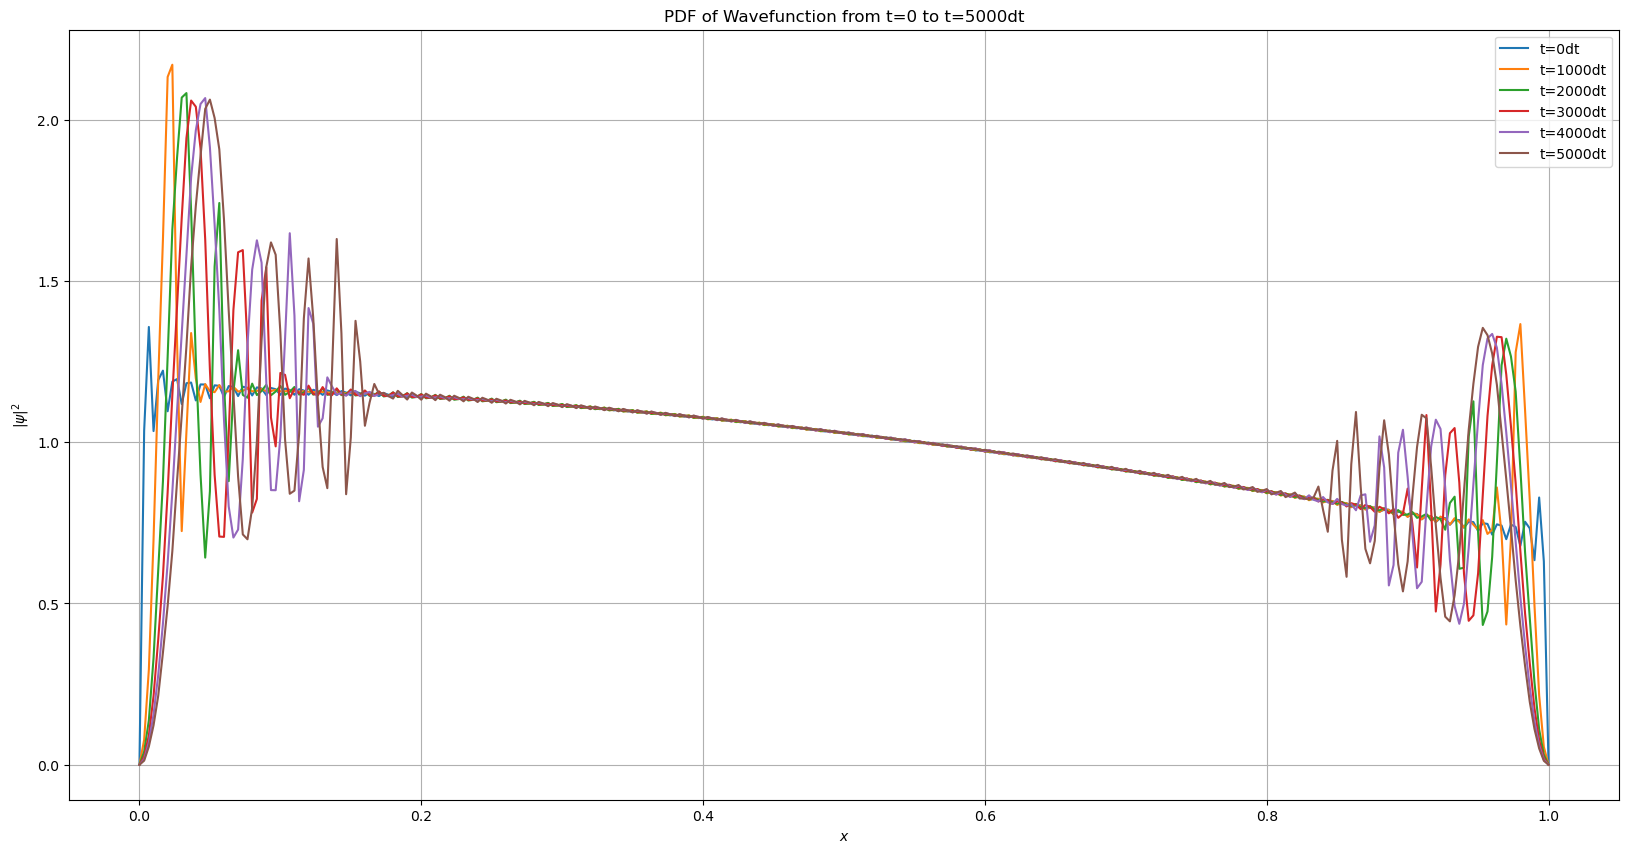

In [5]:
plt.figure(figsize=(20,10))
for m in range(0, 5001, 1000):
    plt.plot(x, np.abs(psi_m2(m*dt))**2, label=f"t={m}dt")
plt.legend()
plt.grid()
plt.xlabel("$x$")
plt.ylabel(r"$|\psi|^2$")
plt.title("PDF of Wavefunction from t=0 to t=5000dt")